Dan Shea  
2017.05.27  

kmeans clutering of expression for genes from RNA-seq data for _B. rapa_ subsp. _pekinensis_ var. S11  
`cuffquant` and `cuffdiff` returned the `gene_exp.diff` file that tells us the expression of the transfrags. We divided the transfrags into different types based on their mapping to gene loci of the _B. rapa_ var. Chiifu-401 reference sequence and additionally created fasta files of the genomic DNA sequences of the transcripts for use in single-strand `blastx` analysis against the Swissprot database. For transfrags that mapped to the correct strand of a gene locus, we can read in the previously generated excel worksheet and obtain the computed differential expression values for `s11_NV` vs. `s11_4V` and perform kmeans clustering on the genes to develop feature sets that correspond to genes that show similar expression changes between the NV and 4V conditions.

In [1]:
# Let's import some of the packages we will require for this analysis
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [2]:
# Define the input excel file we want to load in as a pandas data frame
gene_exp_file = 'gene_exp.diff'

In [3]:
# Load the file as pandas data frame
gene_exp = pd.read_table(gene_exp_file)

In [4]:
gene_exp

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0,Bra000001,Bra000001,Bra000001,A03:8794510-8797095,s11_NV,s11_4V,NOTEST,0.026202,0.000000,-inf,0.000000,1.00000,1.000000,no
1,Bra000002,Bra000002,Bra000002,A03:8797898-8800379,s11_NV,s11_4V,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no
2,Bra000007,Bra000007,Bra000007,A03:8823496-8824207,s11_NV,s11_4V,OK,0.526043,1.645720,1.645470,1.755550,0.02835,0.074204,no
3,Bra000008,Bra000008,Bra000008,A03:8829307-8830496,s11_NV,s11_4V,NOTEST,0.114528,0.090949,-0.332571,0.000000,1.00000,1.000000,no
4,Bra000010,Bra000010,Bra000010,A03:8840534-8842281,s11_NV,s11_4V,NOTEST,0.157205,0.206450,0.393143,0.000000,1.00000,1.000000,no
5,Bra000016,Bra000016,Bra000016,A03:8884292-8886197,s11_NV,s11_4V,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no
6,Bra000020,Bra000020,Bra000020,A03:8897927-8898629,s11_NV,s11_4V,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no
7,Bra000022,Bra000022,Bra000022,A03:8903597-8904350,s11_NV,s11_4V,NOTEST,0.225523,0.033750,-2.740320,0.000000,1.00000,1.000000,no
8,Bra000033,Bra000033,Bra000033,A03:8941847-8945170,s11_NV,s11_4V,OK,0.711796,0.040692,-4.128640,-2.721520,0.07485,0.159078,no
9,Bra000038,Bra000038,Bra000038,A03:8982374-8984291,s11_NV,s11_4V,OK,0.670964,0.651794,-0.041819,-0.046157,0.95035,0.968829,no


In `gene_exp`, entries where the `gene` column have been mapped to a gene will begin with `Bra`. Additionally, we want to only look at genes that were differentially expressed, so the `significant` column will have a value of `yes`.

In [5]:
genes = gene_exp[gene_exp.gene.str.startswith('Bra')]

In [6]:
DEGs = genes[genes.significant.str.match('yes')]

In [7]:
expressionSet = DEGs[['gene','value_1','value_2']]

In [8]:
expressionSet

,gene,value_1,value_2
44,Bra000119,0.144554,0.868545
56,Bra000169,0.298483,0.749125
113,Bra000313,0.868923,0.000000
129,Bra000354,1.246620,0.277918
151,Bra000423,2.107570,0.430426
220,Bra000629,0.502324,0.000000
277,Bra000800,2.033750,0.398620
312,Bra000869,2.520000,1.059770
314,Bra000881,0.510987,1.475630
360,Bra001043,0.000000,0.865084


In [9]:
# Checking if BrFLC2 is there
expressionSet[expressionSet.gene.str.match('Bra028599')]

,gene,value_1,value_2
35408,Bra028599,76.8217,13.8858


In [10]:
kmeans = KMeans(n_clusters=3).fit(expressionSet[['value_1','value_2']])

In [11]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [12]:
%matplotlib inline

In [13]:
from matplotlib import pyplot as plt

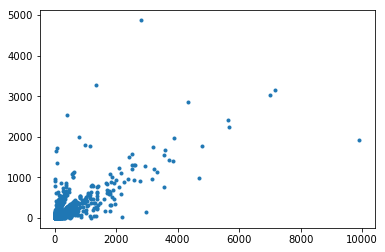

In [14]:
plt.scatter(expressionSet.value_1, expressionSet.value_2, marker='.')

In [15]:
expressionSet['cluster'] = kmeans.labels_

/home/dshea/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
expressionSet.shape

(8795, 4)

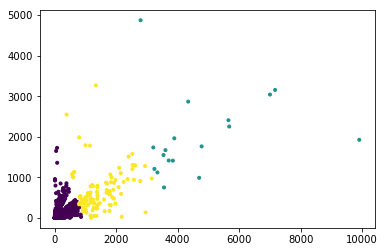

In [17]:
# Try plotting, coloring by cluster
plt.scatter(expressionSet.value_1, expressionSet.value_2,c=expressionSet.cluster, marker='.')

In [18]:
# Checking if BrFLC2 is there
expressionSet[expressionSet.gene.str.match('Bra028599')]

,gene,value_1,value_2,cluster
35408,Bra028599,76.8217,13.8858,0


In [19]:
expressionSet[expressionSet.cluster == 0]

,gene,value_1,value_2,cluster
44,Bra000119,0.144554,0.868545,0
56,Bra000169,0.298483,0.749125,0
113,Bra000313,0.868923,0.000000,0
129,Bra000354,1.246620,0.277918,0
151,Bra000423,2.107570,0.430426,0
220,Bra000629,0.502324,0.000000,0
277,Bra000800,2.033750,0.398620,0
312,Bra000869,2.520000,1.059770,0
314,Bra000881,0.510987,1.475630,0
360,Bra001043,0.000000,0.865084,0


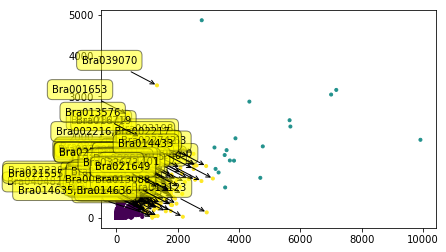

In [20]:
# Try plotting, coloring by cluster, label points in cluster 1 (0-2, which is 3 clusters)
plt.scatter(expressionSet.value_1, expressionSet.value_2,c=expressionSet.cluster, marker='.')
for index, gene, x, y, cluster in expressionSet[expressionSet.cluster == 2].itertuples():
    plt.annotate(
        gene,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4).fit(expressionSet[['value_1','value_2']])

In [22]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [23]:
expressionSet['cluster'] = kmeans.labels_

/home/dshea/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


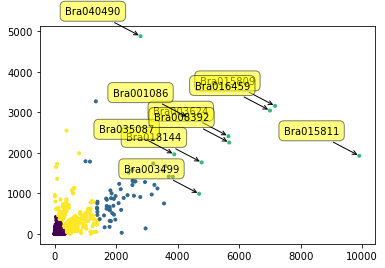

In [24]:
# Try plotting, coloring by cluster, label points in cluster 1 (0-2, which is 3 clusters)
plt.scatter(expressionSet.value_1, expressionSet.value_2,c=expressionSet.cluster, marker='.')
for index, gene, x, y, cluster in expressionSet[expressionSet.cluster == 2].itertuples():
    plt.annotate(
        gene,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5).fit(expressionSet[['value_1','value_2']])

In [26]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [27]:
expressionSet['cluster'] = kmeans.labels_

/home/dshea/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


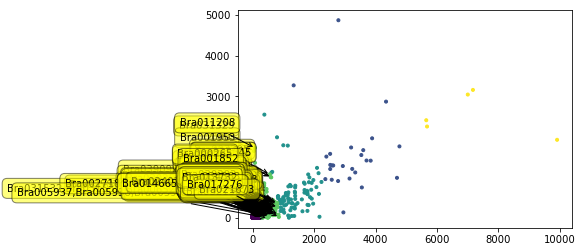

In [28]:
# Try plotting, coloring by cluster, label points in cluster 1 (0-2, which is 3 clusters)
plt.scatter(expressionSet.value_1, expressionSet.value_2,c=expressionSet.cluster, marker='.')
for index, gene, x, y, cluster in expressionSet[expressionSet.cluster == 3].itertuples():
    plt.annotate(
        gene,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [29]:
# To look at the cis-NATs
lncrna_file = 'putative_lncrnas.xlsx'

In [30]:
# Load the worksheet 'putative NATs' into a pandas dataframe
lncrnas = pd.read_excel(lncrna_file, sheetname='putative NATs')

In [31]:
lncrnas

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),...,qry_gene_id,qry_id,FMI,FPKM,FPKM_conf_lo,FPKM_conf_hi,cov,len,major_iso_id,ref_match_len
3,MSTRG.10013,MSTRG.10013,-,A04:15950831-15952453,s11_NV,s11_4V,OK,4.380540,1.756200,-1.318650,...,MSTRG.10013,MSTRG.10013.1,100,0,0,0,0,346,MSTRG.10013.1,1341
11,MSTRG.10058,MSTRG.10058,-,A04:16292280-16293302,s11_NV,s11_4V,OK,1.215500,0.877836,-0.469532,...,MSTRG.10058,MSTRG.10058.1,100,0,0,0,0,1022,MSTRG.10058.1,852
12,MSTRG.10066,MSTRG.10066,-,A04:16297799-16316386,s11_NV,s11_4V,OK,0.970437,1.200640,0.307091,...,MSTRG.10066,MSTRG.10066.1,100,0,0,0,0,373,MSTRG.10066.1,411
17,MSTRG.10130,MSTRG.10130,-,A04:16929633-16930605,s11_NV,s11_4V,OK,1.537330,3.086380,1.005490,...,MSTRG.10130,MSTRG.10130.1,100,0,0,0,0,972,MSTRG.10130.1,675
22,MSTRG.10158,MSTRG.10158,-,A04:17103126-17104264,s11_NV,s11_4V,OK,3.289680,1.239670,-1.407990,...,MSTRG.10158,MSTRG.10158.1,100,0,0,0,0,1138,MSTRG.10158.1,261
29,MSTRG.10223,MSTRG.10223,-,A04:17629220-17630472,s11_NV,s11_4V,OK,1.425500,6.273830,2.137880,...,MSTRG.10223,MSTRG.10223.1,100,0,0,0,0,1252,MSTRG.10223.1,807
34,MSTRG.10334,MSTRG.10334,-,A04:18507892-18510139,s11_NV,s11_4V,OK,3.733960,3.592970,-0.055530,...,MSTRG.10334,MSTRG.10334.1,100,0,0,0,0,1457,MSTRG.10334.1,504
35,MSTRG.10334,MSTRG.10334,-,A04:18507892-18510139,s11_NV,s11_4V,OK,3.733960,3.592970,-0.055530,...,MSTRG.10334,MSTRG.10334.2,100,0,0,0,0,1345,MSTRG.10334.1,504
36,MSTRG.10334,MSTRG.10334,-,A04:18507892-18510139,s11_NV,s11_4V,OK,3.733960,3.592970,-0.055530,...,MSTRG.10334,MSTRG.10334.3,100,0,0,0,0,1074,MSTRG.10334.1,504
40,MSTRG.10412,MSTRG.10412,-,A04:18983869-18984551,s11_NV,s11_4V,OK,0.207932,2.112190,3.344550,...,MSTRG.10412,MSTRG.10412.1,100,0,0,0,0,682,MSTRG.10412.1,480


We want to look at `qry_id`, `value_1`, `value2`, and `ref_gene_id` because some entries have more than one isoform and we want to preserve the mapping to the gene. Additionally, we only look at those NATs that were deemed to be significantly expressed.

In [32]:
DENATs = lncrnas[lncrnas.significant.str.match('yes')][['qry_id','value_1','value_2','ref_gene_id']]

In [33]:
DENATs

,qry_id,value_1,value_2,ref_gene_id
22,MSTRG.10158.1,3.289680,1.239670,Bra017036
46,MSTRG.10467.1,0.884936,6.039600,Bra004446
74,MSTRG.10694.1,4.399380,0.423523,Bra004765
101,MSTRG.10943.1,13.029800,66.332900,Bra005145
201,MSTRG.1162.1,2.205090,3.901190,Bra026425
233,MSTRG.11738.1,6.402750,10.695500,Bra010161
340,MSTRG.12544.1,3.322940,6.060330,Bra029813
343,MSTRG.1260.1,9.349200,4.261560,Bra026279
348,MSTRG.12739.1,1.019460,4.406540,Bra020787
388,MSTRG.13150.1,20891.100000,4867.750000,Bra018810


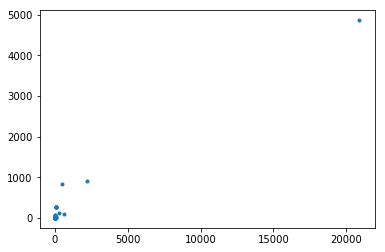

In [34]:
plt.scatter(DENATs.value_1, DENATs.value_2, marker='.')

In [35]:
DENATkmeans = KMeans(n_clusters=3).fit(DENATs[['value_1','value_2']])

In [36]:
DENATkmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int32)

In [37]:
expressionSet_match = expressionSet[expressionSet.gene.isin(DENATs.ref_gene_id)]

In [38]:
DENAT_match = DENATs[DENATs.ref_gene_id.isin(expressionSet.gene)]

In [39]:
expressionSet_match_kmeans = KMeans(n_clusters=3).fit(expressionSet_match[['value_1','value_2']])

In [40]:
DENAT_match_kmeans = KMeans(n_clusters=3).fit(DENAT_match[['value_1','value_2']])

In [41]:
expressionSet_match['cluster'] = expressionSet_match_kmeans.labels_

/home/dshea/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
DENAT_match['cluster'] = DENAT_match_kmeans.labels_

/home/dshea/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
expressionSet_match

,gene,value_1,value_2,cluster
16963,Bra004446,0.89278,2.930110,0
22117,Bra025323,7.78977,19.671500,0
24235,Bra003511,4.47764,0.310284,0
24617,Bra004009,34.78040,9.353070,0
24912,Bra016256,41.95890,10.070200,0
28484,Bra037845,2.56710,26.685900,0
29354,Bra021594,18.91030,69.478600,2
29675,Bra029572,7.07153,0.934367,0
30929,Bra007504,4.02342,10.182700,0
34114,Bra009516,9.37201,3.506510,0


In [44]:
DENAT_match

,qry_id,value_1,value_2,ref_gene_id,cluster
46,MSTRG.10467.1,0.884936,6.039600,Bra004446,1
641,MSTRG.15105.1,2.800880,7.263030,Bra025323,1
927,MSTRG.17011.1,2.645350,0.290237,Bra003511,1
971,MSTRG.17356.1,8.324130,1.392840,Bra004009,0
998,MSTRG.17623.1,9.664810,3.212040,Bra016256,0
1442,MSTRG.20836.1,0.881350,3.026110,Bra037845,1
1559,MSTRG.2161.1,0.488938,4.038090,Bra021594,1
1618,MSTRG.21908.2,8.750650,24.686700,Bra029572,2
1796,MSTRG.23036.1,1.047820,4.863770,Bra007504,1
2127,MSTRG.25903.1,4.792080,0.861523,Bra009516,1


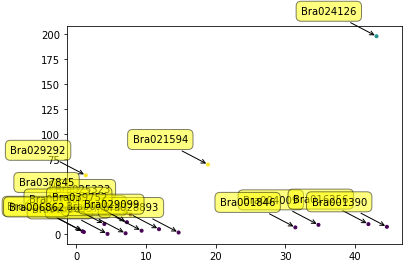

In [45]:
# Try plotting, coloring by cluster, label points
plt.scatter(expressionSet_match.value_1, expressionSet_match.value_2,c=expressionSet_match.cluster, marker='.')

for index, gene, x, y, cluster in expressionSet_match.itertuples():
    plt.annotate(
        gene,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

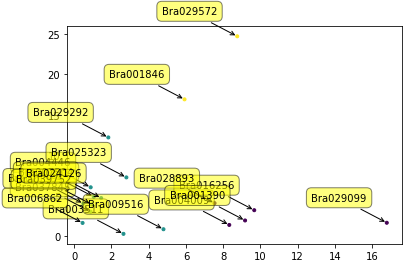

In [46]:
# Try plotting, coloring by cluster, label points
plt.scatter(DENAT_match.value_1, DENAT_match.value_2,c=DENAT_match.cluster, marker='.')

for index, qry_id, x, y, ref_gene_id, cluster in DENAT_match.itertuples():
    plt.annotate(
        ref_gene_id,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [47]:
# Let's join the two tables together and see about comparing up/up up/down down/up and down/down
# regulatory patterns
mergedSet = pd.merge(expressionSet_match, DENAT_match, how='inner', left_on='gene', right_on='ref_gene_id')

In [48]:
mergedSet

,gene,value_1_x,value_2_x,cluster_x,qry_id,value_1_y,value_2_y,ref_gene_id,cluster_y
0,Bra004446,0.89278,2.930110,0,MSTRG.10467.1,0.884936,6.039600,Bra004446,1
1,Bra025323,7.78977,19.671500,0,MSTRG.15105.1,2.800880,7.263030,Bra025323,1
2,Bra003511,4.47764,0.310284,0,MSTRG.17011.1,2.645350,0.290237,Bra003511,1
3,Bra004009,34.78040,9.353070,0,MSTRG.17356.1,8.324130,1.392840,Bra004009,0
4,Bra016256,41.95890,10.070200,0,MSTRG.17623.1,9.664810,3.212040,Bra016256,0
5,Bra037845,2.56710,26.685900,0,MSTRG.20836.1,0.881350,3.026110,Bra037845,1
6,Bra021594,18.91030,69.478600,2,MSTRG.2161.1,0.488938,4.038090,Bra021594,1
7,Bra029572,7.07153,0.934367,0,MSTRG.21908.2,8.750650,24.686700,Bra029572,2
8,Bra007504,4.02342,10.182700,0,MSTRG.23036.1,1.047820,4.863770,Bra007504,1
9,Bra009516,9.37201,3.506510,0,MSTRG.25903.1,4.792080,0.861523,Bra009516,1


In [49]:
mergedSet=mergedSet.drop(['cluster_x','cluster_y'], axis=1)

In [50]:
mergedSet

,gene,value_1_x,value_2_x,qry_id,value_1_y,value_2_y,ref_gene_id
0,Bra004446,0.89278,2.930110,MSTRG.10467.1,0.884936,6.039600,Bra004446
1,Bra025323,7.78977,19.671500,MSTRG.15105.1,2.800880,7.263030,Bra025323
2,Bra003511,4.47764,0.310284,MSTRG.17011.1,2.645350,0.290237,Bra003511
3,Bra004009,34.78040,9.353070,MSTRG.17356.1,8.324130,1.392840,Bra004009
4,Bra016256,41.95890,10.070200,MSTRG.17623.1,9.664810,3.212040,Bra016256
5,Bra037845,2.56710,26.685900,MSTRG.20836.1,0.881350,3.026110,Bra037845
6,Bra021594,18.91030,69.478600,MSTRG.2161.1,0.488938,4.038090,Bra021594
7,Bra029572,7.07153,0.934367,MSTRG.21908.2,8.750650,24.686700,Bra029572
8,Bra007504,4.02342,10.182700,MSTRG.23036.1,1.047820,4.863770,Bra007504
9,Bra009516,9.37201,3.506510,MSTRG.25903.1,4.792080,0.861523,Bra009516


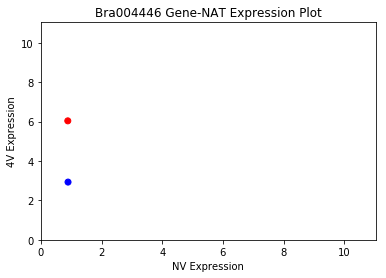

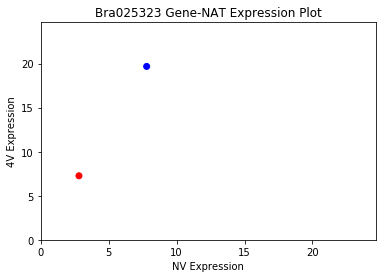

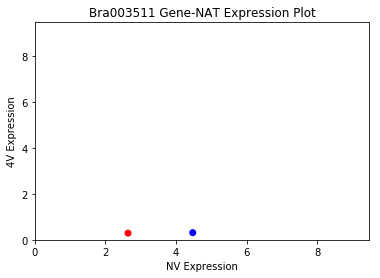

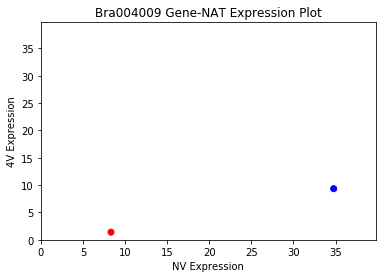

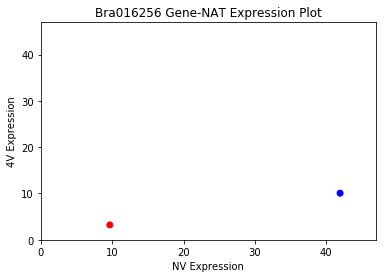

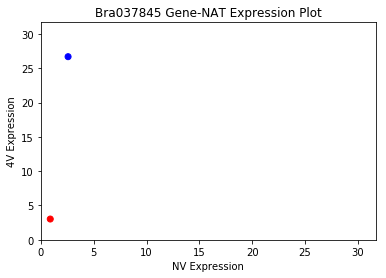

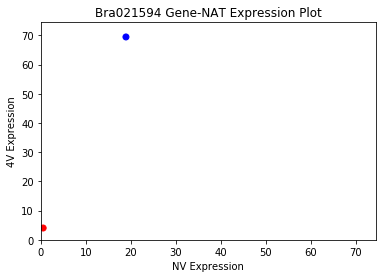

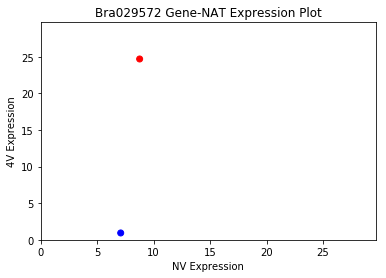

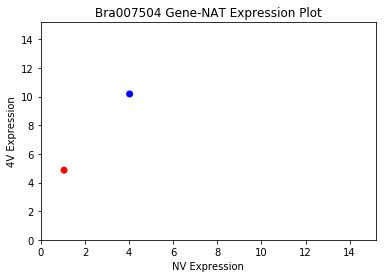

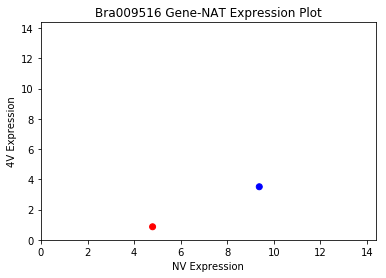

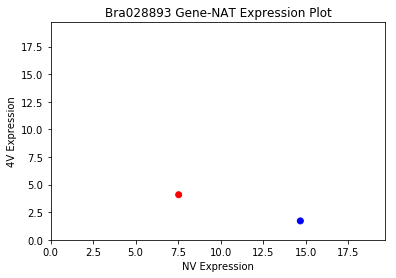

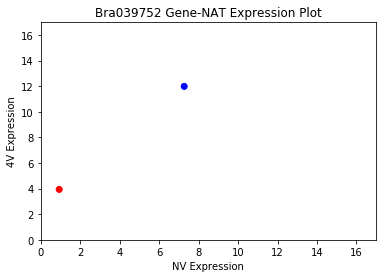

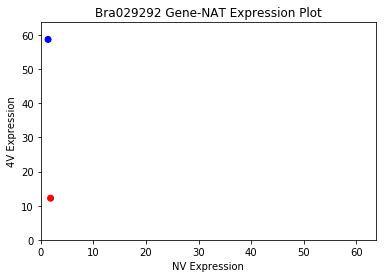

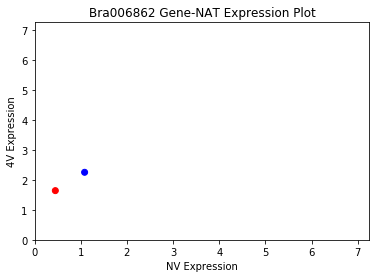

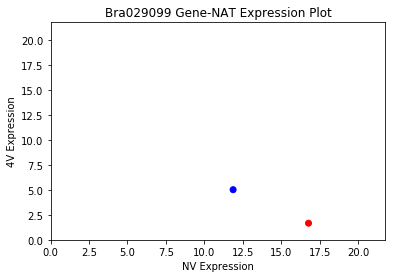

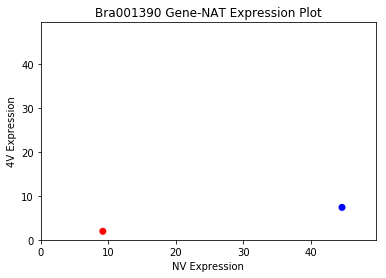

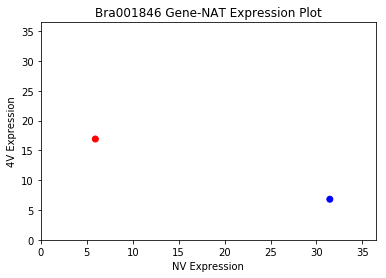

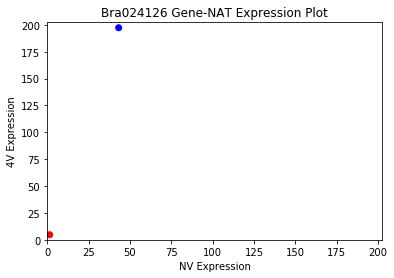

In [51]:
for index, gene, g_value1, g_value2, nat, n_value1, n_value2, ref_g in mergedSet.itertuples():
    plt.scatter([g_value1, n_value1],[g_value2, n_value2], c=['blue', 'red'])
    #plt.annotate(
    #    gene,
    #    xy=(g_value1, g_value2), xytext=(-20, 20),
    #    textcoords='offset points', ha='right', va='bottom',
    #    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
    #    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    #plt.annotate(
    #    nat,
    #    xy=(n_value1, n_value2), xytext=(-20, 20),
    #    textcoords='offset points', ha='right', va='bottom',
    #    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
    #    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.title('{} Gene-NAT Expression Plot'.format(gene))
    plt.xlabel('NV Expression')
    plt.ylabel('4V Expression')
    plt.xlim(0, max([g_value1, g_value2, n_value1, n_value2])+5)
    plt.ylim(0, max([g_value1, g_value2, n_value1, n_value2])+5)
    #plt.xlim(0, 200)
    #plt.ylim(0, 200)
    plt.savefig('{}.png'.format(gene),dpi=300)
    plt.show()